In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import train_test_split

<h1>Sample Collection<h1>

In [2]:
c_data = pd.read_csv('Data/archive/crime/23_Anti_corruprion_cases.csv')
c_data.head()

,Area_Name,Year,AC01_No_of_cases_pending_investigation_from_previous_year,AC02_No_of_cases_registered_during_the_year,AC03_Total_No_of_cases_for_investigation_during_the_year,AC04_No_of_cases_investigated_during_the_year,AC05_No_of_cases_not_investigatedor_in_which_investigation_was_dropped_due_to_any_reason_during_the_year,AC06_No_of_cases_transferred_to_local_police_during_the_year,AC07_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature,AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year,...,AC18_No_of_cases_pending_trial_from_the_previous_year,AC19_No_of_cases_sent_up_for_trial_during_the_year,AC20_Total_No_of_cases_for_trial_during_the_year,AC21_No_of_cases_withdrawn_or_other_wise_disposed_off_on_account_of_death_of_the_accused_during_the_year,AC22_No_of_cases_in_which_trials_were_completed_during_the_year,AC23_No_of_cases_convicted_during_the_year,AC24_No_of_cases_acquitted_or_discharged_during_the_year,AC25_No_of_cases_pending_trial_at_the_end_of_the_year,AC26_Percentage_of_cases_convicted_to_cases_in_which_trials_were_completed_during_the_year,AC27_Total_amount_of_fine_imposed_during_the_year_in_Rs
0,Andaman & Nicobar Islands,2001,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0.0,0
1,Andaman & Nicobar Islands,2002,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0.0,0
2,Andaman & Nicobar Islands,2003,7,3,10,9,0,1,0,1,...,2,1,3,0,0,0,0,3,0.0,0
3,Andaman & Nicobar Islands,2004,7,3,10,10,0,0,0,0,...,3,0,3,0,0,0,0,3,0.0,0
4,Andaman & Nicobar Islands,2005,10,2,12,3,0,0,2,1,...,3,1,4,0,0,0,0,4,0.0,0


In [3]:
total_c = pd.DataFrame(c_data[['Area_Name','Year', 'AC03_Total_No_of_cases_for_investigation_during_the_year']])
total_c.head()

,Area_Name,Year,AC03_Total_No_of_cases_for_investigation_during_the_year
0,Andaman & Nicobar Islands,2001,0
1,Andaman & Nicobar Islands,2002,0
2,Andaman & Nicobar Islands,2003,10
3,Andaman & Nicobar Islands,2004,10
4,Andaman & Nicobar Islands,2005,12


In [4]:
r_data = pd.read_csv('Data/archive/42_Cases_under_crime_against_women.csv')
r_data.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,...,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,5,2,3,0,0,0,...,1,3,34,36,3,3,5,0,0,39
1,Andaman & Nicobar Islands,2002,Rape,01. Rape,2,0,3,0,1,0,...,0,1,34,34,2,3,3,0,0,37
2,Andaman & Nicobar Islands,2003,Rape,01. Rape,3,0,1,0,3,0,...,1,0,29,34,2,1,6,0,0,35
3,Andaman & Nicobar Islands,2004,Rape,01. Rape,4,0,4,0,0,0,...,7,1,29,29,10,4,4,0,0,33
4,Andaman & Nicobar Islands,2005,Rape,01. Rape,3,0,8,0,1,0,...,3,7,33,29,4,8,4,0,0,37


In [5]:
total_r = pd.DataFrame(r_data[['Area_Name', 'Year', 'Total_Cases_for_Trial']])
total_r.head()

,Area_Name,Year,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,39
1,Andaman & Nicobar Islands,2002,37
2,Andaman & Nicobar Islands,2003,35
3,Andaman & Nicobar Islands,2004,33
4,Andaman & Nicobar Islands,2005,37


In [6]:
combined_df = pd.merge(total_c, total_r, on=['Area_Name', 'Year'])
combined_df.head()

,Area_Name,Year,AC03_Total_No_of_cases_for_investigation_during_the_year,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,0,39
1,Andaman & Nicobar Islands,2002,0,37
2,Andaman & Nicobar Islands,2003,10,35
3,Andaman & Nicobar Islands,2004,10,33
4,Andaman & Nicobar Islands,2005,12,37


<h1>Data Preparation<h1>

In [7]:
combined_clean=combined_df.copy()

In [8]:
combined_clean.rename(columns = {'AC03_Total_No_of_cases_for_investigation_during_the_year' : 'Corruption_cases', 'Total_Cases_for_Trial' : 'Rape_cases'}, inplace = True)
combined_clean.columns = combined_clean.columns.str.upper()
combined_clean.head()

,AREA_NAME,YEAR,CORRUPTION_CASES,RAPE_CASES
0,Andaman & Nicobar Islands,2001,0,39
1,Andaman & Nicobar Islands,2002,0,37
2,Andaman & Nicobar Islands,2003,10,35
3,Andaman & Nicobar Islands,2004,10,33
4,Andaman & Nicobar Islands,2005,12,37


In [9]:
combined_clean = combined_clean.dropna(subset=['CORRUPTION_CASES', 'RAPE_CASES'])

In [10]:
#Q1 = rape_train['RAPE_CASES'].quantile(0.25)
#Q3 = rape_train['RAPE_CASES'].quantile(0.75)
#IQR = Q3 - Q1

#lbound = Q1- 1.5 * IQR
#ubound = Q3 + 1.5 * IQR

#combined_clean = combined_clean[(combined_clean['RAPE_CASES'] >= lbound) & (combined_clean['RAPE_CASES'] <= ubound)]

In [11]:
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AREA_NAME         346 non-null    object
 1   YEAR              346 non-null    int64 
 2   CORRUPTION_CASES  346 non-null    int64 
 3   RAPE_CASES        346 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.9+ KB


In [12]:
corrupt = pd.DataFrame(combined_clean['CORRUPTION_CASES'])
rape = pd.DataFrame(combined_clean['RAPE_CASES'])

<h1>Exploratory Analysis & Analytic Visualisation<h1>

C:\Users\zayds\AppData\Local\Temp\ipykernel_12276\811551331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(corrupt, kde = False, ax = axes[0,1])
C:\Users\zayds\AppData\Local\Temp\ipykernel_12276\811551331.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rape, kde = False, ax = axes[1,1])


<Axes: >

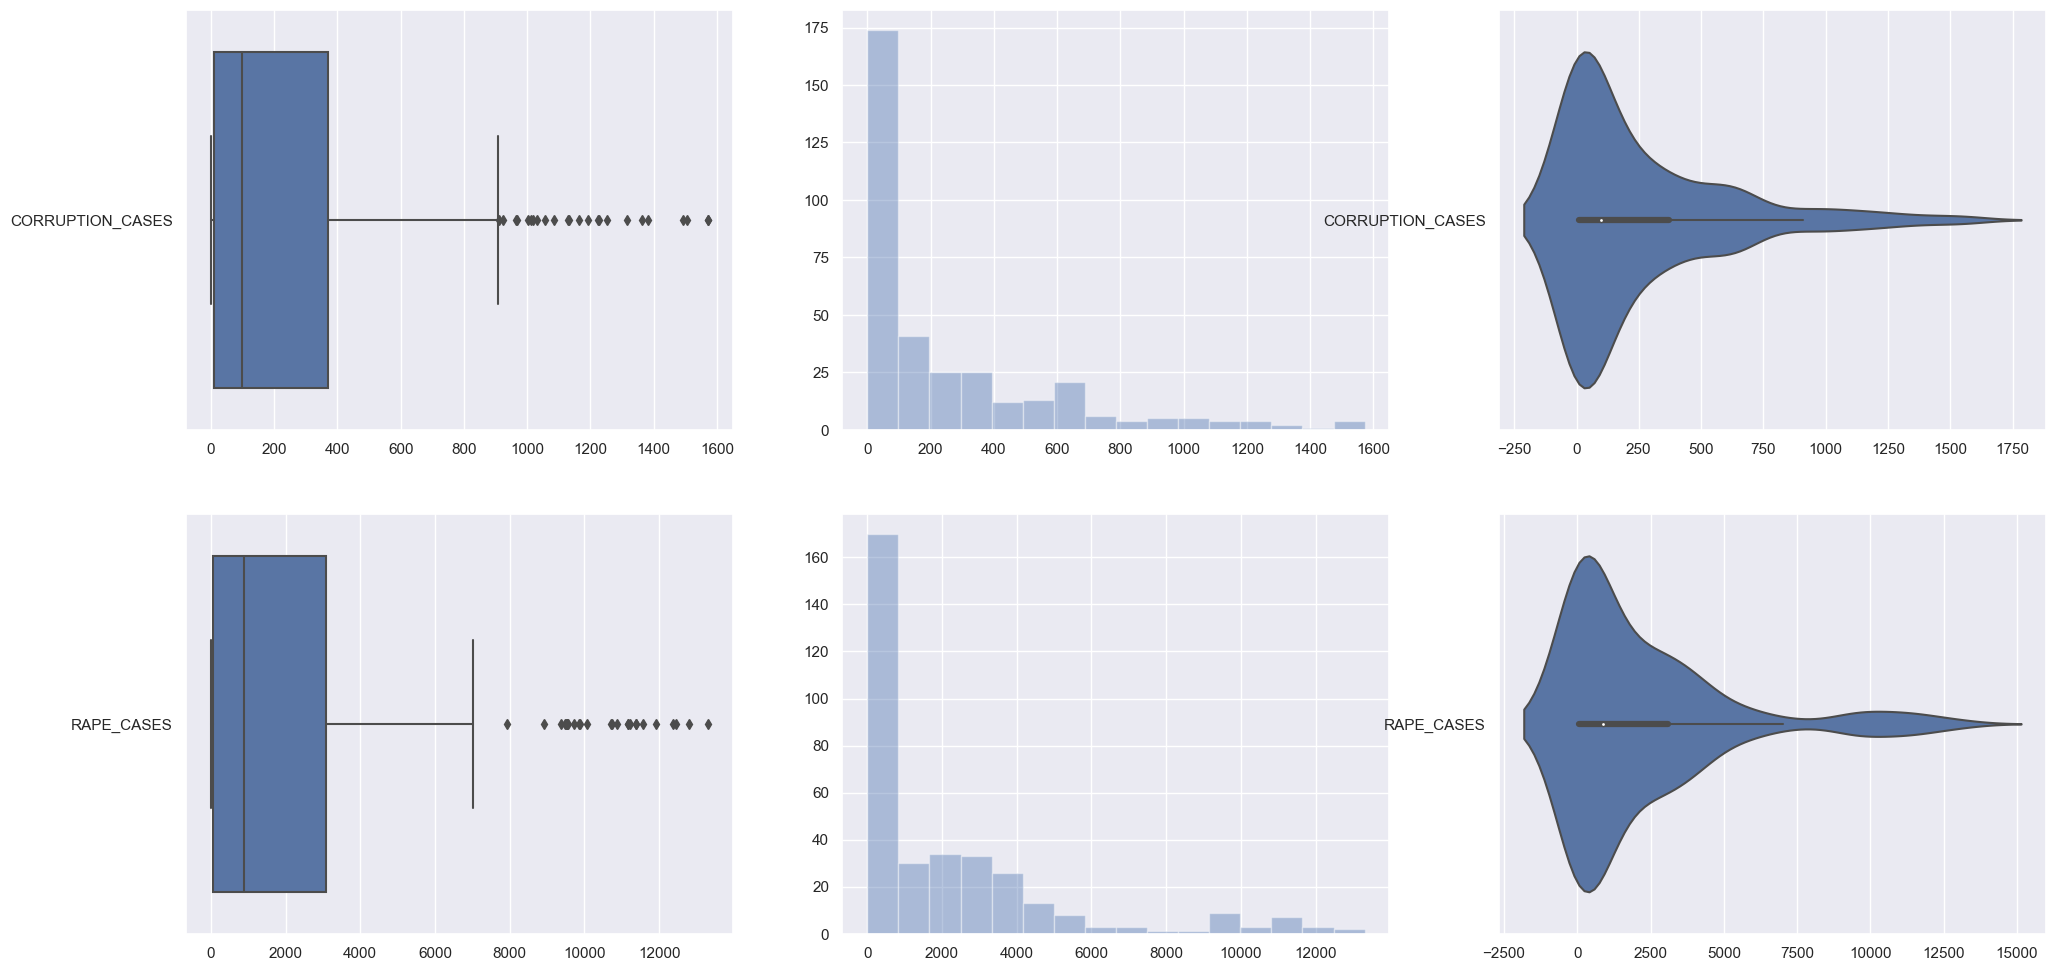

In [13]:
f, axes = plt.subplots(2, 3, figsize = (24, 12))

sb.boxplot(corrupt, orient = "h", ax = axes[0,0])
sb.distplot(corrupt, kde = False, ax = axes[0,1])
sb.violinplot(corrupt, orient = "h", ax = axes[0,2])

sb.boxplot(rape, orient = "h", ax = axes[1,0])
sb.distplot(rape, kde = False, ax = axes[1,1])
sb.violinplot(rape, orient = "h", ax = axes[1,2])

C:\Users\zayds\AppData\Local\Temp\ipykernel_12276\873028816.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  r_state = sb.catplot(x = 'AREA_NAME', y = 'RAPE_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
C:\Users\zayds\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'show'

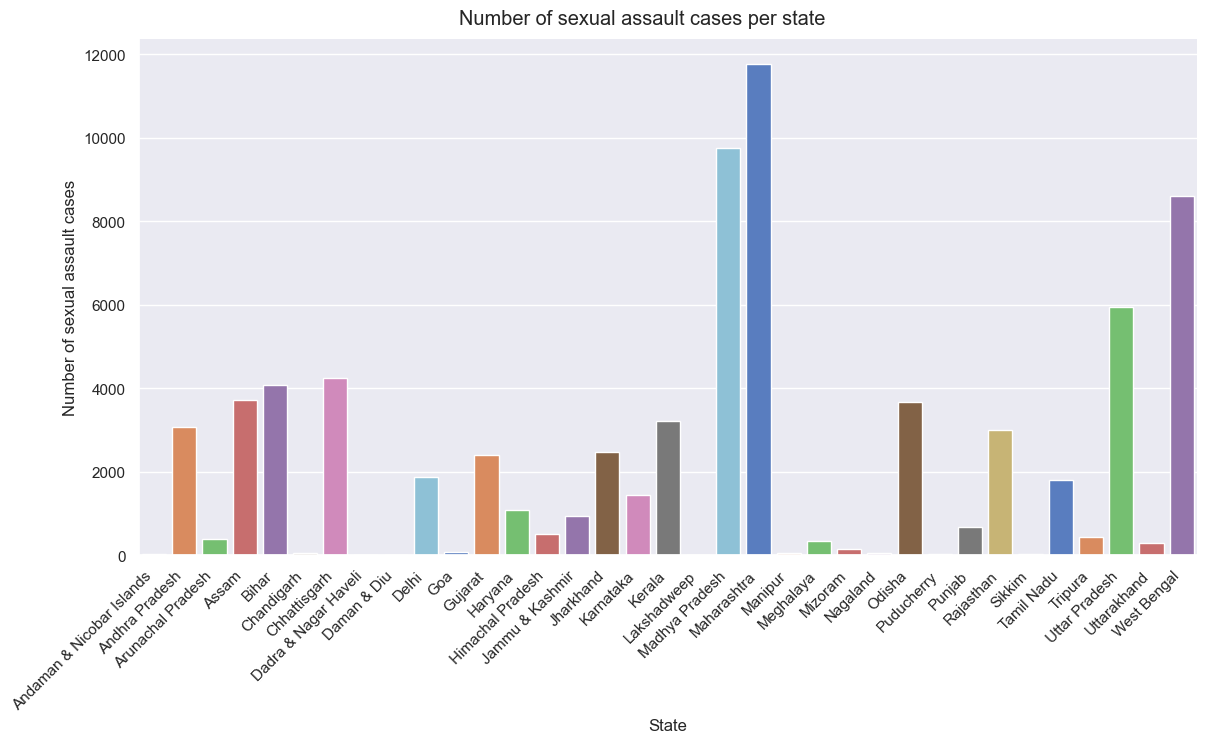

In [14]:
r_state = sb.catplot(x = 'AREA_NAME', y = 'RAPE_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
r_state.set_axis_labels("State", "Number of sexual assault cases")
r_state.fig.suptitle("Number of sexual assault cases per state", y = 1.02)
for ax in r_state.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
r_state.show()

C:\Users\zayds\AppData\Local\Temp\ipykernel_12276\3084328367.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  c_state = sb.catplot(x = 'AREA_NAME', y = 'CORRUPTION_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
C:\Users\zayds\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'show'

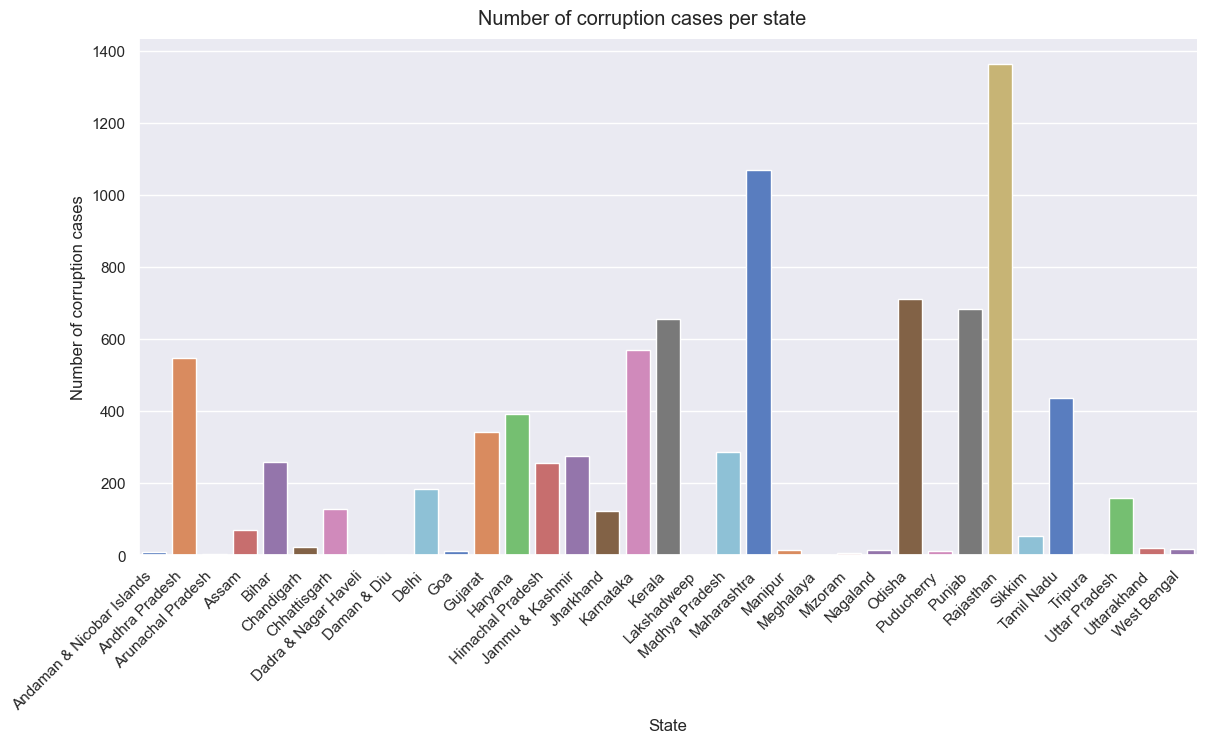

In [15]:
c_state = sb.catplot(x = 'AREA_NAME', y = 'CORRUPTION_CASES', kind = 'bar', data = combined_clean, ci = None, palette = 'muted', height = 6, aspect = 2)
c_state.set_axis_labels("State", "Number of corruption cases")
c_state.fig.suptitle("Number of corruption cases per state", y = 1.02)
for ax in c_state.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
r_state.show()

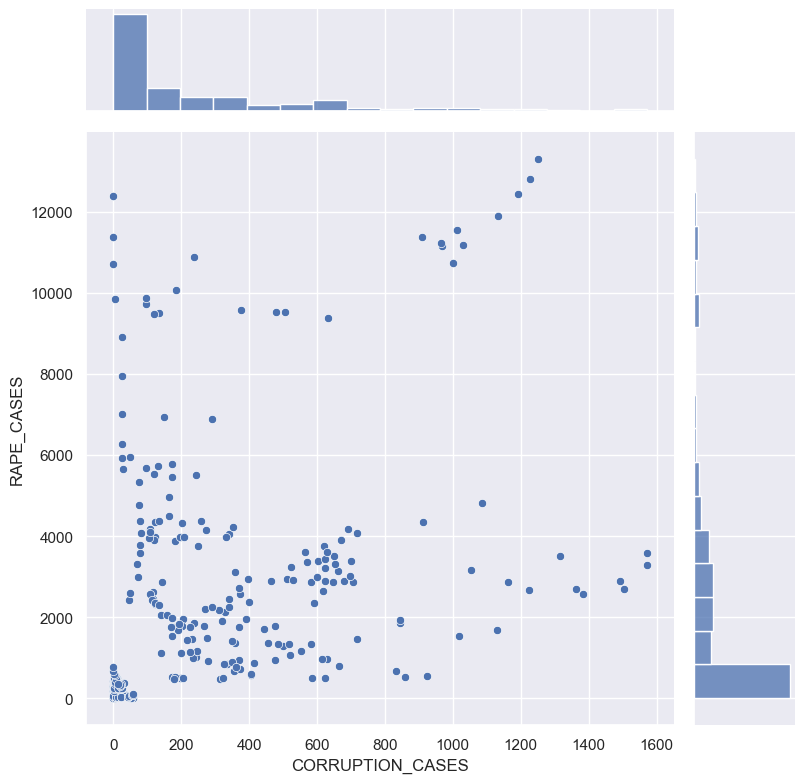

In [16]:
sb.jointplot(x=combined_clean['CORRUPTION_CASES'], y=combined_clean['RAPE_CASES'], height=8)

In [17]:
num_data = combined_clean.copy()
num_data.drop(['AREA_NAME'], axis = 1, inplace = True)
num_data.drop(['YEAR'], axis = 1, inplace = True)

In [18]:
num_data.corr()

,CORRUPTION_CASES,RAPE_CASES
CORRUPTION_CASES,1.000000,0.417787
RAPE_CASES,0.417787,1.000000


<Axes: >

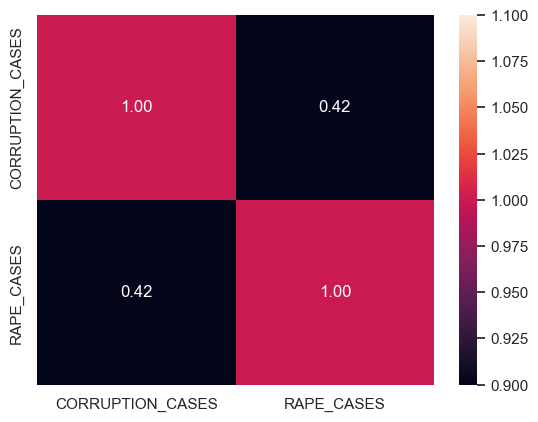

In [19]:
sb.heatmap(num_data.corr(), vmin = 1, annot = True, fmt = ".2f")

<h1>Algorithmic Optmisation<h1>

<h2>Linear Regression<h2>

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
rape_train, rape_test = train_test_split(rape, test_size=0.25)
corrupt_train, corrupt_test = train_test_split(corrupt, test_size=0.25)

In [22]:
rape_train.head()

,RAPE_CASES
170,3018
299,1786
282,2580
12,2888
258,19


In [23]:
rape_test.head()

,RAPE_CASES
331,372
196,10886
15,2898
313,565
237,53


In [24]:
linreg = LinearRegression()

In [25]:
linreg.fit(corrupt_train, rape_train)

LinearRegression()

In [26]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2213.84172968]
Coefficients 	: a =  [[-0.24398927]]


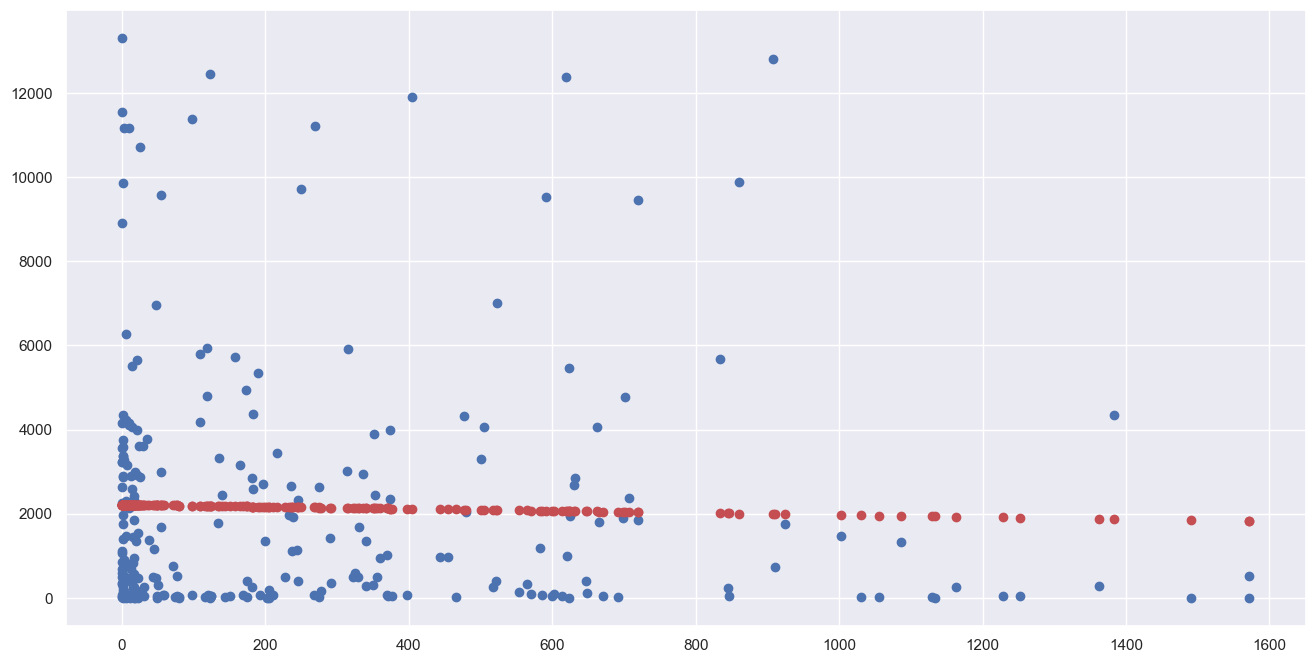

In [27]:
rape_train_pred = linreg.predict(corrupt_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_train, rape_train)
plt.scatter(corrupt_train, rape_train_pred, color = "r")
plt.show()

In [28]:
print("Explained Variance (R^2) \t:", linreg.score(corrupt_train, rape_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(rape_train, rape_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.0007859462912124249
Mean Squared Error (MSE) 	: 8593151.80512763
Root Mean Squared Error (RMSE) 	: 2931.4078196538317


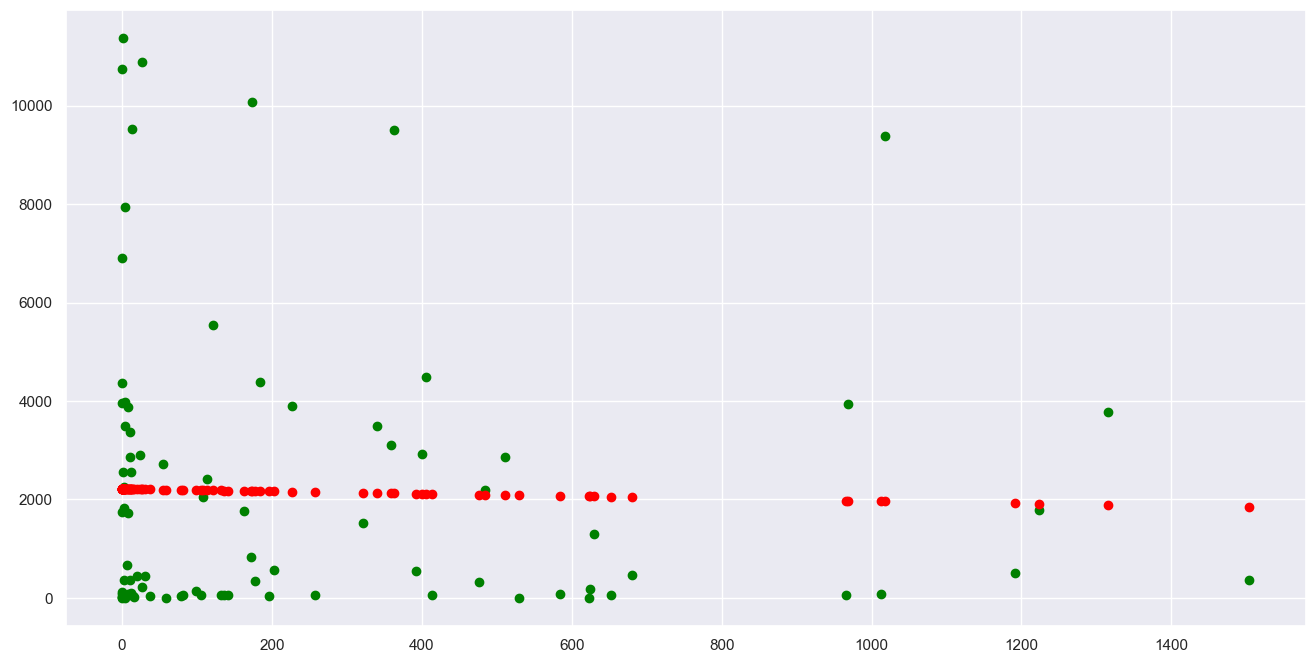

In [29]:
rape_test_pred = linreg.predict(corrupt_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_test, rape_test, color = "green")
plt.scatter(corrupt_test, rape_test_pred, color = "red")
plt.show()

In [30]:
print("Explained Variance (R^2) \t:", linreg.score(corrupt_test, rape_test))
mse = mean_sq_err(rape_test, rape_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.0023215749323535206
Mean Squared Error (MSE) 	: 8631846.938923594
Root Mean Squared Error (RMSE) 	: 2938.000500157138


<h2>K-Nearest Neighbors<h2>

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(corrupt_train, rape_train)

C:\Users\zayds\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

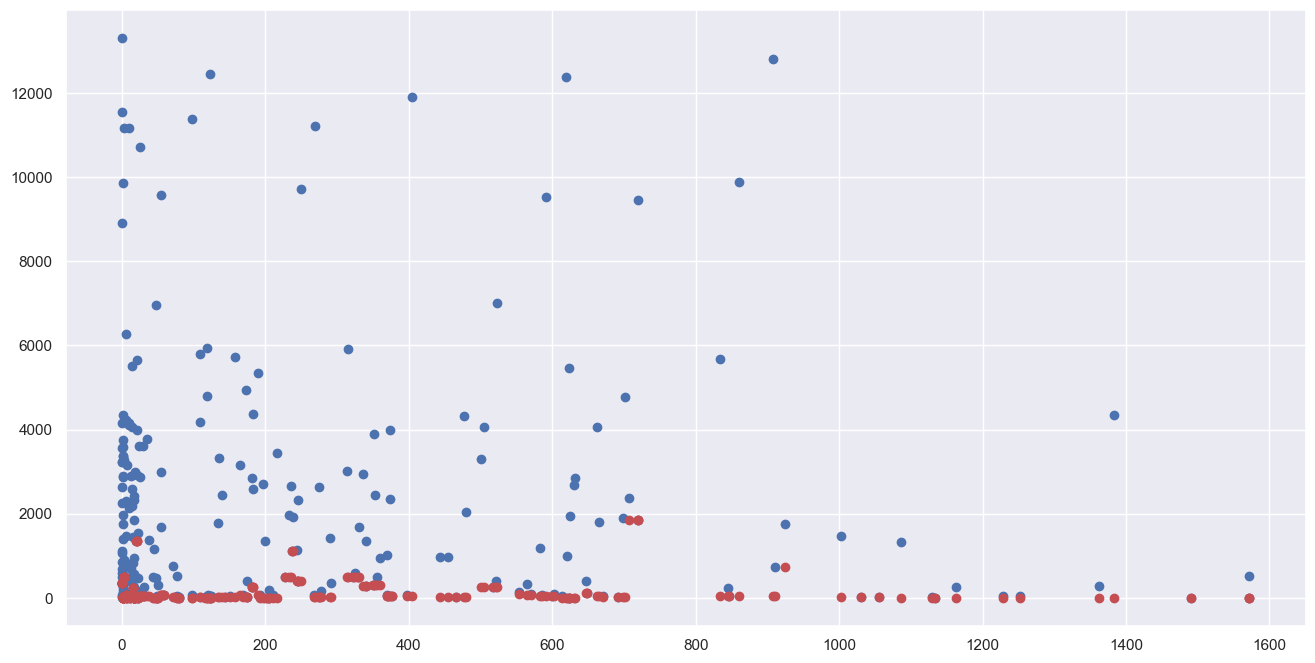

In [34]:
rape_train_pred = knn.predict(corrupt_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_train, rape_train)
plt.scatter(corrupt_train, rape_train_pred, color = "r")
plt.show()

In [35]:
print("Explained Variance (R^2) \t:", knn.score(corrupt_train, rape_train))

mse = mean_sq_err(rape_train, rape_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.17374517374517376
Mean Squared Error (MSE) 	: 12658849.17955904
Root Mean Squared Error (RMSE) 	: 3557.9276523784238


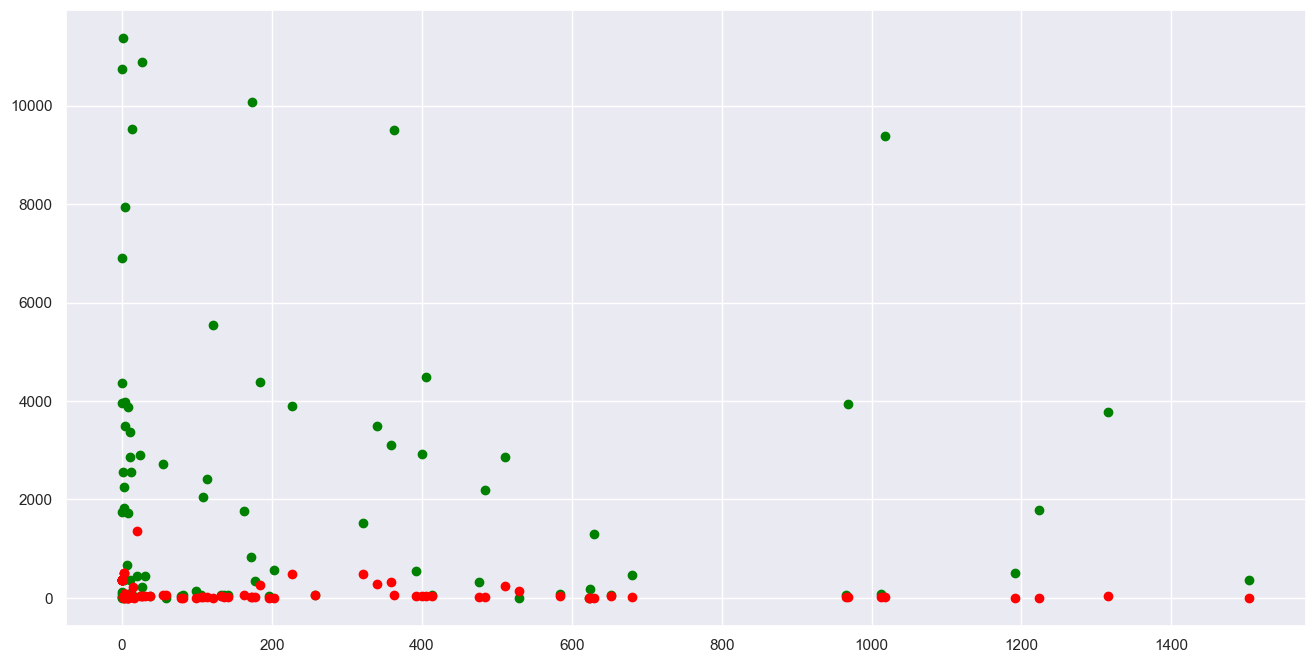

In [36]:
rape_test_pred = knn.predict(corrupt_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_test, rape_test, color = "green")
plt.scatter(corrupt_test, rape_test_pred, color = "red")
plt.show()

In [37]:
print("Explained Variance (R^2) \t:", knn.score(corrupt_test, rape_test))
mse = mean_sq_err(rape_test, rape_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.011494252873563218
Mean Squared Error (MSE) 	: 12957897.973180076
Root Mean Squared Error (RMSE) 	: 3599.7080399915876


<h3>Neural Network<h3>

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
X_train = corrupt_train.values.reshape(-1, 1)
X_test = corrupt_test.values.reshape(-1, 1) 

In [42]:
neuralnetwork = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),  # Input layer with 10 neurons, change depending on complexity
    Dense(1)  # Output layer with 1 neuron
])

# Compile the model
neuralnetwork.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\zayds\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
neuralnetwork.fit(X_train, rape_train, epochs=100, validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 11927945.0000 - val_loss: 18963886.0000
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14086938.0000 - val_loss: 18952108.0000
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11471040.0000 - val_loss: 18939972.0000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9764495.0000 - val_loss: 18927776.0000
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12840216.0000 - val_loss: 18915236.0000
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13014263.0000 - val_loss: 18903166.0000
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13100241.0000 - val_loss: 18890188.0000
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9157777.0000 - val_loss: 18877530.0000
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12686374.0000 - val_loss: 18863900.0000
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12077064.0000 - val_loss: 18850230.0000
Epoch 11/100
7/7 ━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9970166.0000 - val_loss: 17613224.0000
Epoch 64/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10906604.0000 - val_loss: 17588286.0000
Epoch 65/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11736857.0000 - val_loss: 17561110.0000
Epoch 66/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11947507.0000 - val_loss: 17534734.0000
Epoch 67/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8772683.0000 - val_loss: 17510488.0000
Epoch 68/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11413197.0000 - val_loss: 17487310.0000
Epoch 69/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11191162.0000 - val_loss: 17467176.0000
Epoch 70/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11503172.0000 - val_loss: 17447094.0000
Epoch 71/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10534796.0000 - val_loss: 17422958.0000
Epoch 72/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9390894.0000 - val_loss: 17400640.0000
Epoch 73/100
7/7 ━━━━━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


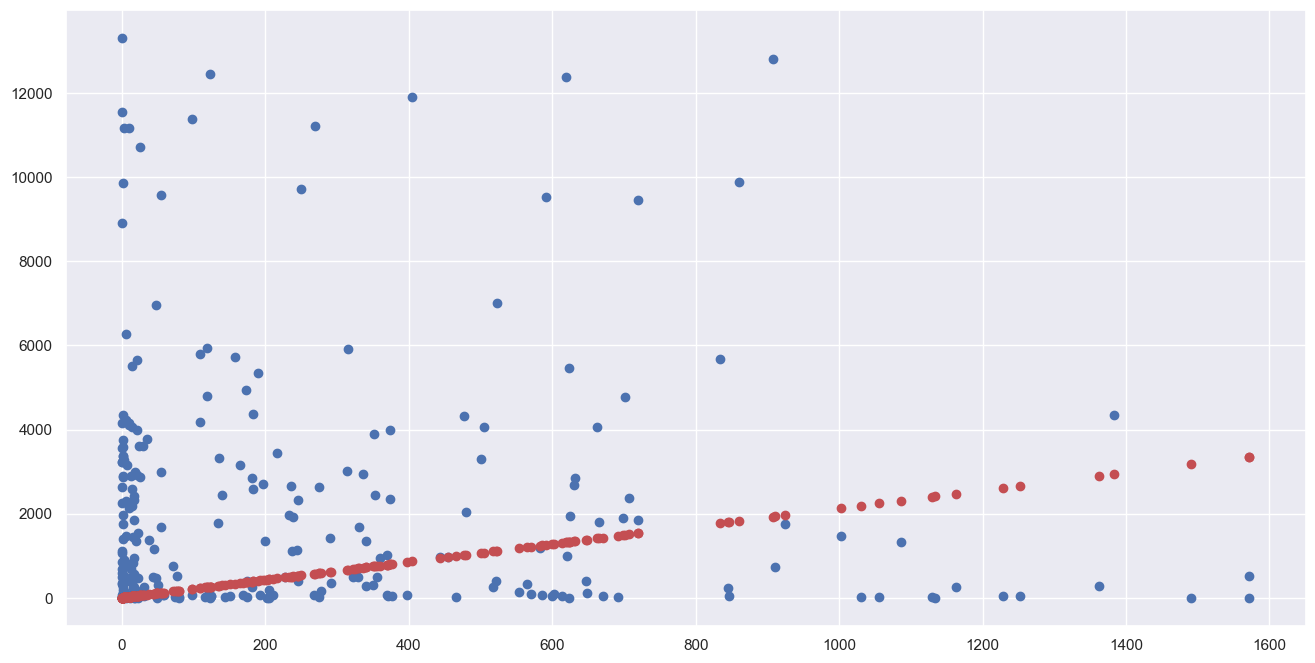

In [45]:
rape_train_pred = neuralnetwork.predict(corrupt_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_train, rape_train)
plt.scatter(corrupt_train, rape_train_pred, color = "r")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


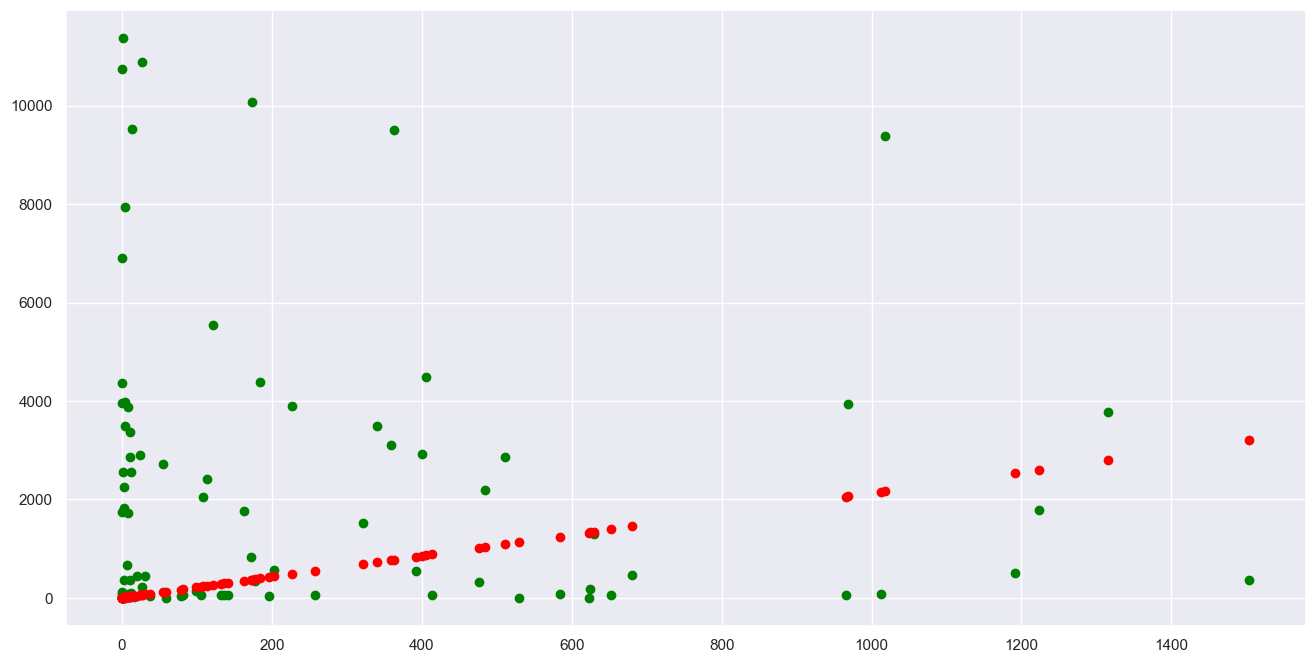

In [47]:
rape_test_pred = neuralnetwork.predict(corrupt_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(corrupt_test, rape_test, color = "green")
plt.scatter(corrupt_test, rape_test_pred, color = "red")
plt.show()